Newton's Second Law
Matthew Saporito
9/1/2022

#  <font color='Red'> **Import Necessary Modules** </font>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

π = np.pi

###  <font color='Red'> Before we start lets define the times in which all our experiments will take place. </font>

###  <font color='Red'> Define a time-increment (Δt), initial (t0), and a final (tf) time for your experiment. And with it a time_array. </font>

In [ ]:
Δt = 0.1 #s
t0 = 0 #s
tf = 10.0 #s

time = np.arange(t0, tf + Δt, Δt)

print(time)
len(time)

[ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.   1.1  1.2  1.3
  1.4  1.5  1.6  1.7  1.8  1.9  2.   2.1  2.2  2.3  2.4  2.5  2.6  2.7
  2.8  2.9  3.   3.1  3.2  3.3  3.4  3.5  3.6  3.7  3.8  3.9  4.   4.1
  4.2  4.3  4.4  4.5  4.6  4.7  4.8  4.9  5.   5.1  5.2  5.3  5.4  5.5
  5.6  5.7  5.8  5.9  6.   6.1  6.2  6.3  6.4  6.5  6.6  6.7  6.8  6.9
  7.   7.1  7.2  7.3  7.4  7.5  7.6  7.7  7.8  7.9  8.   8.1  8.2  8.3
  8.4  8.5  8.6  8.7  8.8  8.9  9.   9.1  9.2  9.3  9.4  9.5  9.6  9.7
  9.8  9.9 10. ]


101

#   <font color='Red'> **Experiment I: Gravity Free-Fall** </font>

##   <font color='Red'> To begin lets start with by defining an initial position, initial velocity, and mass. </font>

In [ ]:
x_0 = np.array([1., 0., 0.]) # m
v_0 = np.array([1., 0., 0.,]) # m/s
m = 1.00 # kg

print(x_0)
print(v_0)
print(m)


[1. 0. 0.]
[1. 0. 0.]
1.0


##   <font color='Red'> Now lets define our force as a function of time, f_t . </font>

In [ ]:
g = -9.81 ## m/s/s
f_t = np.zeros((len(time), 3))
f_t[:,0] = m*g ## in x-direction # e.g. f_t[:,2] = m*g for z-direction

##   <font color='Red'> Define a for-loop to Velocity-Verlet integrate the motion to obtain a x_t, v_t, and a_t. </font>

In [ ]:
x_t = np.zeros((len(time), 3 ))
v_t = np.zeros((len(time), 3 ))
a_t = np.zeros((len(time), 3 ))

x_t[0] = x_0
v_t[0] = v_0
a_t[0] = f_t[0] / m
for t in range(1,len(x_t)):
  x_t[t] = x_t[t-1] + v_t[t-1] * Δt + 0.5 * a_t[t-1] * Δt*Δt
  a_t[t] = f_t[t] / m
  v_t[t] = v_t[t-1] + 0.5 * ( a_t[t-1] + a_t[t] ) * Δt

###   <font color='Red'> Take a time-derivative of x_t to obtain dxdt_t. </font>

###   <font color='Red'> Take a time-derivative of v_t to obtain dvdt_t. </font>

In [ ]:
dxdt_t = np.gradient(x_t, axis=0)/Δt
dvdt_t = np.gradient(v_t, axis=0)/Δt

###   <font color='Red'> Make 3 plots of with: x_t, \{v_t, dxdt_t\}, and \{ a_t, dv/dt_t f_t/mass\} in matplotlib, all as a function of time. Make sure to include all LABELS!. </font>

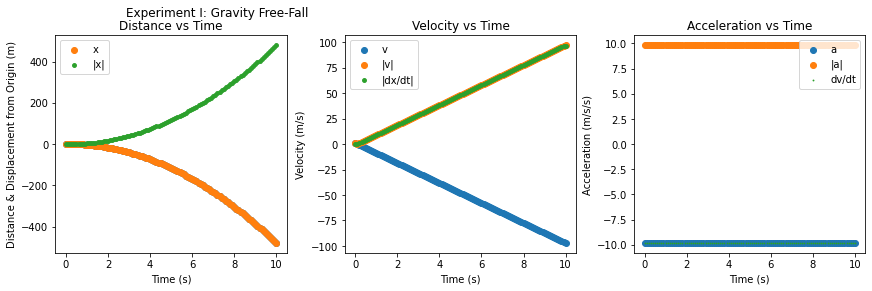

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.suptitle("Experiment I: Gravity Free-Fall")
fig.subplots_adjust(hspace=0.01, wspace=0.25, right=2)

ax1.scatter(time, x_t[:,0])
ax1.scatter(time, (x_t[:,0]), label="x")
ax1.scatter(time, np.linalg.norm(x_t, axis=1), s=15, label="|x|")
ax1.set_title("Distance vs Time")
ax1.legend()
ax1.set(xlabel="Time (s)", ylabel="Distance & Displacement from Origin (m)")

ax2.scatter(time, (v_t[:,0]), label="v")
ax2.scatter(time, np.linalg.norm(v_t   , axis=1), label="|v|")
ax2.scatter(time, np.linalg.norm(dxdt_t, axis=1), s=15, label="|dx/dt|")
ax2.set_title("Velocity vs Time")
ax2.legend()
ax2.set(xlabel="Time (s)", ylabel="Velocity (m/s)")

ax3.scatter(time, a_t[:,0], label="a")
ax3.scatter(time, np.linalg.norm(a_t   , axis=1), label="|a|")
ax3.scatter(time, dvdt_t[:,0], s=0.75, label="dv/dt")
ax3.legend(loc="upper right")
ax3.set_title("Acceleration vs Time")
ax3.set(xlabel="Time (s)", ylabel="Acceleration (m/s/s)")
fig.show()

###   <font color='Red'> Let's replot these graphs but for the magnitude of the vectors. </font>

In [ ]:
# included in above graphs

#   <font color='Red'> **Experiment II: Forces on a Cart I** </font>

###  <font color='Red'> To begin lets start with by defining an initial position & velocity, and mass. </font>

In [ ]:
x_0 = np.array([1., 0., 0.]) # m
v_0 = np.array([1., 0., 0.]) # m/s
m = np.array([1., 0., 0.]) # kg

print(x_0)
print(v_0)
print(m)

[1. 0. 0.]
[1. 0. 0.]
[1. 0. 0.]


###  <font color='Red'> Define a force as a function of time, with a bump function. Plot the result in time. </font>

<bound method Figure.show of <Figure size 432x288 with 1 Axes>>

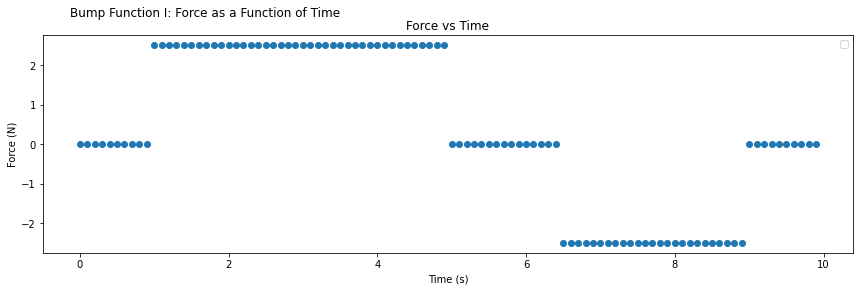

In [ ]:
dt = .1
time = np.arange(0, 10, dt)

f_t = np.zeros((len(time),3))

f_t[4,], f_t[5,], f_t[6,], f_t[7,]

m = 0.5 # kg
a = 5.0 # m/s/s

f_t[10:50, 1] = m*a # N
f_t[65:90, 1] = m*-a # N

fig, (ax1) = plt.subplots(1)
fig.suptitle("Bump Function I: Force as a Function of Time")
fig.subplots_adjust(hspace=0.01, wspace=0.25, right=2)

ax1.scatter(time, f_t[:, 1])
ax1.set_title("Force vs Time")
ax1.legend()
ax1.set(xlabel="Time (s)", ylabel="Force (N)")
fig.show

###  <font color='Red'> Define a for-loop to Velocity-Verlet integrate the motion to obtain a x_t, v_t, and a_t. </font>

In [ ]:
x_t = np.zeros((len(time), 3 ))
v_t = np.zeros((len(time), 3 ))
a_t = np.zeros((len(time), 3 ))

x_t[0] = x_0
v_t[0] = v_0
a_t[0] = f_t[0] / m
for t in range(1,len(x_t)):
  x_t[t] = x_t[t-1] + v_t[t-1] * Δt + 0.5 * a_t[t-1] * Δt*Δt
  a_t[t] = f_t[t] / m
  v_t[t] = v_t[t-1] + 0.5 * ( a_t[t-1] + a_t[t] ) * Δt

###  <font color='Red'> Take a time-derivative of x_t to obtain dxdt_t. </font>

###  <font color='Red'> Take a time-derivative of v_t to obtain dvdt_t. </font>


In [ ]:
dxdt_t = np.gradient(x_t, axis=0)/Δt
dvdt_t = np.gradient(v_t, axis=0)/Δt

###  <font color='Red'> Make 3 plots of with: x_t, \{v_t, dxdt_t\}, and \{ a_t, dv/dt_t f_t/mass\} in matplotlib, all as a function of time. Make sure to include all LABELS!. </font>


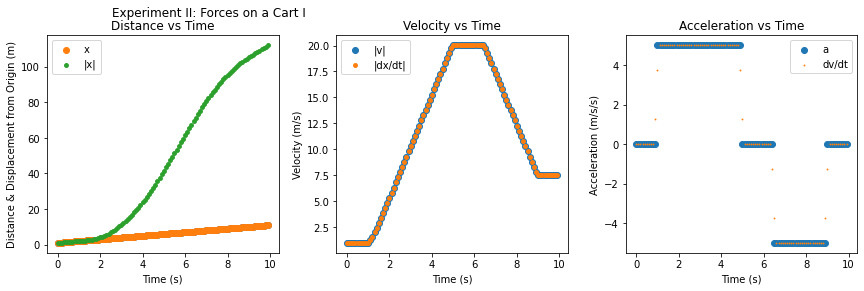

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.suptitle("Experiment II: Forces on a Cart I")
fig.subplots_adjust(hspace=0.01, wspace=0.25, right=2)

ax1.scatter(time, x_t[:,0])
ax1.scatter(time, (x_t[:,0]), label="x")
ax1.scatter(time, np.linalg.norm(x_t, axis=1), s=15, label="|x|")
ax1.set_title("Distance vs Time")
ax1.legend()
ax1.set(xlabel="Time (s)", ylabel="Distance & Displacement from Origin (m)")

ax2.scatter(time, np.linalg.norm(v_t, axis=1), label="|v|")
ax2.scatter(time, np.linalg.norm(dxdt_t, axis=1), s=15, label="|dx/dt|")
ax2.set_title("Velocity vs Time")
ax2.legend()
ax2.set(xlabel="Time (s)", ylabel="Velocity (m/s)")

ax3.scatter(time, a_t[:,1], label="a")
ax3.scatter(time, dvdt_t[:,1], s=0.75, label="dv/dt")
ax3.legend(loc="upper right")
ax3.set_title("Acceleration vs Time")
ax3.set(xlabel="Time (s)", ylabel="Acceleration (m/s/s)")
fig.show()

#   <font color='Red'> **Experiment III: Forces on a Cart II** </font>

###   <font color='Red'> To begin lets start with by defining an initial position & velocity. </font>

In [ ]:
x_0 = np.array([1., 0., 0.]) # m
v_0 = np.array([1., 0., 0.]) # m/s


print(x_0)
print(v_0)


[1. 0. 0.]
[1. 0. 0.]


###   <font color='Red'> Define a time-increment (Δt), initial (t0), and a final (tf) time for your experiment. And with it a time_array. </font>

In [ ]:
Δt = 0.1 #s
t0 = 0 #s
tf = 10.0 #s

time = np.arange(t0, tf + Δt, Δt)

print(time)
len(time)

[ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.   1.1  1.2  1.3
  1.4  1.5  1.6  1.7  1.8  1.9  2.   2.1  2.2  2.3  2.4  2.5  2.6  2.7
  2.8  2.9  3.   3.1  3.2  3.3  3.4  3.5  3.6  3.7  3.8  3.9  4.   4.1
  4.2  4.3  4.4  4.5  4.6  4.7  4.8  4.9  5.   5.1  5.2  5.3  5.4  5.5
  5.6  5.7  5.8  5.9  6.   6.1  6.2  6.3  6.4  6.5  6.6  6.7  6.8  6.9
  7.   7.1  7.2  7.3  7.4  7.5  7.6  7.7  7.8  7.9  8.   8.1  8.2  8.3
  8.4  8.5  8.6  8.7  8.8  8.9  9.   9.1  9.2  9.3  9.4  9.5  9.6  9.7
  9.8  9.9 10. ]


101

###   <font color='Red'> Define a force as a function of time, with a bump function. Plot the result in time. </font>

<bound method Figure.show of <Figure size 432x288 with 1 Axes>>

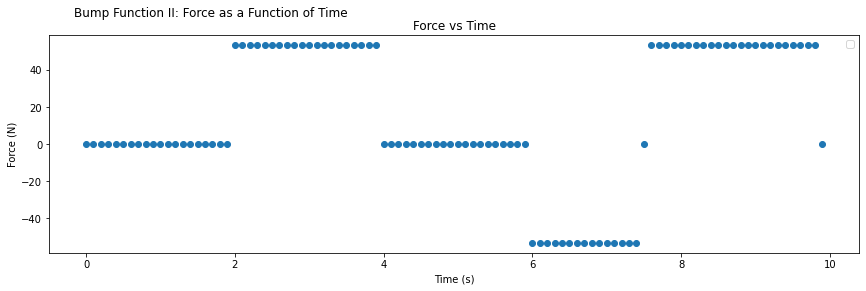

In [ ]:
dt = .1
time = np.arange(0, 10, dt)

f_t = np.zeros((len(time),3))

f_t[4,], f_t[5,], f_t[6,], f_t[7,]

m = 3.5 # kg
a = 15.2 # m/s/s

f_t[20:40, 1] = m*a # N
f_t[60:75, 1] = m*-a # N
f_t[76:99, 1] = m*a # N

fig, (ax1) = plt.subplots(1)
fig.suptitle("Bump Function II: Force as a Function of Time")
fig.subplots_adjust(hspace=0.01, wspace=0.25, right=2)

ax1.scatter(time, f_t[:, 1])
ax1.set_title("Force vs Time")
ax1.legend()
ax1.set(xlabel="Time (s)", ylabel="Force (N)")
fig.show

###   <font color='Red'> Define a for-loop to Velocity-Verlet integrate the motion to obtain a x_t, v_t, and a_t. </font>

In [ ]:
x_t = np.zeros((len(time), 3 ))
v_t = np.zeros((len(time), 3 ))
a_t = np.zeros((len(time), 3 ))

x_t[0] = x_0
v_t[0] = v_0
a_t[0] = f_t[0] / m
for t in range(1,len(x_t)):
  x_t[t] = x_t[t-1] + v_t[t-1] * Δt + 0.5 * a_t[t-1] * Δt*Δt
  a_t[t] = f_t[t] / m
  v_t[t] = v_t[t-1] + 0.5 * ( a_t[t-1] + a_t[t] ) * Δt

###   <font color='Red'> Take a time-derivative of x_t to obtain dxdt_t. </font>

###   <font color='Red'> Take a time-derivative of v_t to obtain dvdt_t. </font>


In [ ]:
dxdt_t = np.gradient(x_t, axis=0)/Δt
dvdt_t = np.gradient(v_t, axis=0)/Δt

###   <font color='Red'> Make 3 plots of with: x_t, \{v_t, dxdt_t\}, and \{ a_t, dvdt_t, f_t/mass\} in matplotlib, all as a function of time. Make sure to include all LABELS!. </font>

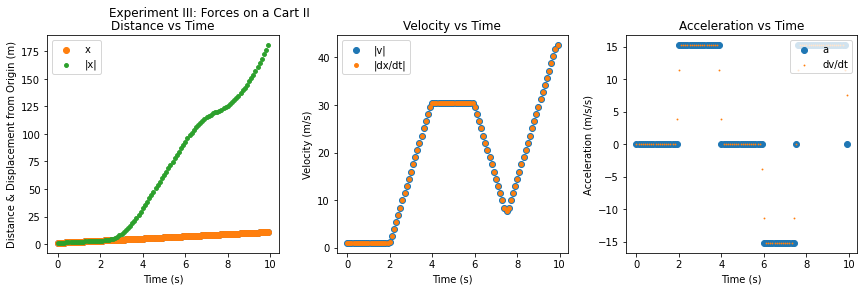

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.suptitle("Experiment III: Forces on a Cart II")
fig.subplots_adjust(hspace=0.01, wspace=0.25, right=2)

ax1.scatter(time, x_t[:,0])
ax1.scatter(time, (x_t[:,0]), label="x")
ax1.scatter(time, np.linalg.norm(x_t, axis=1), s=15, label="|x|")
ax1.set_title("Distance vs Time")
ax1.legend()
ax1.set(xlabel="Time (s)", ylabel="Distance & Displacement from Origin (m)")

ax2.scatter(time, np.linalg.norm(v_t, axis=1), label="|v|")
ax2.scatter(time, np.linalg.norm(dxdt_t, axis=1), s=15, label="|dx/dt|")
ax2.set_title("Velocity vs Time")
ax2.legend()
ax2.set(xlabel="Time (s)", ylabel="Velocity (m/s)")

ax3.scatter(time, a_t[:,1], label="a")
ax3.scatter(time, dvdt_t[:,1], s=0.75, label="dv/dt")
ax3.legend(loc="upper right")
ax3.set_title("Acceleration vs Time")
ax3.set(xlabel="Time (s)", ylabel="Acceleration (m/s/s)")
fig.show()

###   <font color='Red'> Write your Conclusion here, you may type in word-processor, only to copy-n-paste it here. This .ipynb file is your lab report. </font>

###   <font color='Red'> Demostrate you understand this lab, this is the most imporant part of the lab report worth half of the total points. </font>

In this lab, we analyzed three different conditions: free fall under gravity (constant acceleration) and two conditions where a varying force (varying acceleration) was introduced to a cart. In experiment I, the acceleration was a constant -9.8 m/s/s, thus producing a constant force over the entire time interval as shown by the Experiment I graph. In the other two experiments, the acceleration vector varied from 5.0 m/s/s to -5.0 m/s/s and 15.2 m/s/s to -15.2 m/s/s which produced a varying yet still proportional force during the time intervals. This is shown in graphs in Experiments II and III. ln all conditions, it was shown that force was directly proportional to acceleration. 

###   <font color='Red'> Is the Force Proportional to the Acceleration? </font>

####   <font color='Red'> Answer while referencing your simulations. </font>


By examining Newton’s Second Law experimentally, it is possible to conclude that force is directly proportional to acceleration. That is, 
F=m*a
where m is expressed in units of kg, acceleration is expressed in units of m/s/s, and F is expressed in units of N. The experimental data displayed in the bump function graphs support this. In Bump Function I, the acceleration is 5.0 m/s/s, mass is 0.5 kg and the force is 2.5 N from the 10th time element to the 50th time element. The acceleration vector then changes direction from the 65th time element to the 90th time element. However, the proportionality remains and the force is -2.5 N. In Bump Function II, this proportional relationship is shown as the acceleration is 15.2 m/s/s, mass is 3.5 kg and the force is 53.2. Additionally, during the time intervals where negative acceleration is introduced, the velocity decreases as shown in the graphs. 


###   <font color='Red'> Do objects with different masses fall at the same rate? </font>

####   <font color='Red'> That is neglecting air-resistance and in the same environment. Answer while referencing your simulations. </font>

Neglecting air resistance, objects of different masses fall at the same rate. Since g, the acceleration due to gravity is the same for all objects, different masses would fall at the same rate since their change in velocity would be the same. In experiment I, changing the mass of the object had no effect on the slope of the velocity graph. 